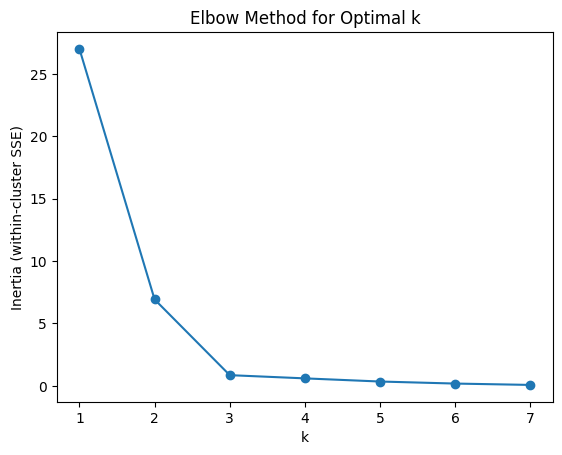

Scaled dataset 
[[-1.30290182 -1.49604073 -1.29354835]
 [-1.17544403 -1.04722851 -1.29354835]
 [-1.04798625 -1.18187218 -0.84578161]
 [-0.2407536  -0.14960407 -0.39801488]
 [-0.07080988  0.07480204  0.04975186]
 [ 0.09913383  0.29920815  0.04975186]
 [ 1.03382427  0.97242648  0.94528533]
 [ 1.24625391  1.33147625  1.39305207]
 [ 1.45868356  1.19683258  1.39305207]]

Orginal dataset 
   income  spend_score  visits  Clusters
0   35000           25       3         2
1   38000           35       3         2
2   41000           32       4         2
3   60000           55       5         0
4   64000           60       6         0
5   68000           65       6         0
6   90000           80       8         1
7   95000           88       9         1
8  100000           85       9         1


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.DataFrame({
    "income":      [35_000, 38_000, 41_000, 60_000, 64_000, 68_000, 90_000, 95_000, 100_000],
    "spend_score": [25,     35,     32,     55,     60,     65,     80,     88,     85],
    "visits":      [3,      3,      4,      5,      6,      6,      8,      9,      9]
})
X=StandardScaler().fit_transform(df)
#elbow curve
inertias=[]
K=range(1,8)
for k in K:
    km = KMeans(n_clusters=k, n_init=10, random_state=0)
    km.fit(X)
    inertias.append(km.inertia_)
plt.plot(K, inertias, marker="o")
plt.xlabel("k"); plt.ylabel("Inertia (within-cluster SSE)")
plt.title("Elbow Method for Optimal k")
plt.show()

#Chose k=3 visually and fit
best_k=3
model= KMeans(n_clusters=best_k, n_init=10, random_state=0)
df['Clusters']=model.fit_predict(X)
print("Scaled dataset ")
print(X)
print("\nOrginal dataset ")
print(df)

